##The problem statement:


.Predict the percentage of an student based on no. of study hours.



##Loading data

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
#read data
df=pd.read_csv('/student_scores.csv')
#show the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [10]:
#missing data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##Visualise Data

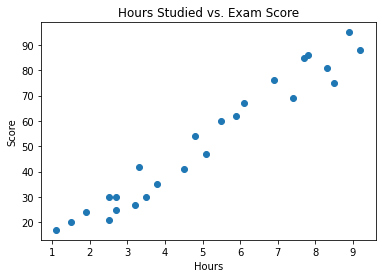

In [11]:
#create a scatterplot to view the relationship between the two variables:
plt.scatter(df.Hours,df.Scores)
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

```
From the plot we can see that the relationship does appear to be linear. 
As hours increases, score tends to increase as well in a linear fashion.
```

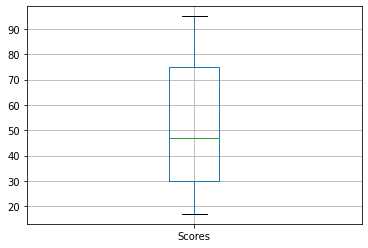

In [12]:
#create a boxplot to visualize the distribution of exam scores and check for outliers:
df.boxplot(column=['Scores'])

```
There are no tiny circles in the boxplot, which means there are no outliers in our dataset.
```

##Model Building

```
Once we’ve confirmed that the relationship between our variables is linear and that there are no outliers present,

we can proceed to fit a simple linear regression model using hours as the explanatory variable and score as the response variable:
```

In [13]:
#Split data into explanatory and response variable:

#define response variable:
y=df['Scores']

#define explanatory variable:
x=df[['Hours']]

In [14]:
#Instantiate model
LR=LinearRegression()

#fit model
LR.fit(x,y)

LinearRegression()

In [17]:
LR.coef_

array([9.77580339])

In [18]:
LR.intercept_

2.48367340537321

```
#From the model summary we can see that the fitted regression equation is:
Score=2.4837+9.7758*(hours)
```

```
This means that each additional hour studied is associated with an average
increase in exam score of 9.7758 points.
And the intercept value of 2.4837 tells us the average
expected exam score for a student who studies zero hours.
```

```
We can look at what will be a predicted score if student studies for 9.25hrs/day ?
```

In [22]:
student_score=LR.predict([[9.25]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [23]:
student_score

array([92.90985477])

```
A student who studies for 9.25 hours is expected to receive an exam score of 92.90985
```

##Saving Model

In [25]:
import joblib
joblib.dump(LR, 'lr_model.pkl') 

['lr_model.pkl']

In [26]:
from google.colab import files
files.download('lr_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>